In [1]:
!pip install fastparquet

  Using cached fsspec-2024.12.0-py3-none-any.whl.metadata (11 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 9.0 MB/s eta 0:00:00a 0:00:01
Using cached fsspec-2024.12.0-py3-none-any.whl (183 kB)


In [1]:
import pandas as pd
import numpy as np
import pyarrow
import fastparquet


In [6]:
file_path = r"/home/Nema/UniCRS_GraphRAG/GraphRAG/output/20250119-161611/artifacts/create_final_relationships.parquet"
df = pd.read_parquet(file_path)
df.to_csv(r"/home/Nema/UniCRS_GraphRAG/GraphRAG/output/20250119-161611/artifacts/create_final_relationships.csv")

In [6]:
file_path = r"/home/Nema/UniCRS_GraphRAG/GraphRAG/output/20250126-163409/artifacts/create_final_relationships.parquet"
df = pd.read_parquet(file_path)
df.to_csv(r"/home/Nema/UniCRS_GraphRAG/GraphRAG/output/20250126-163409/artifacts/create_final_relationships.csv")

In [5]:
df

,id,human_readable_id,source,target,description,weight,combined_degree,text_unit_ids
0,4f0f2be5-ce51-4fc9-b1bb-c2436bef5239,0,SUPER TROOPERS (2001),POLICE ACADEMY (1984),Both movies are comedy movies),1.0,3,[3d22b0b879485bb78e4eec2ad9e69d20c76cce9111f59...
1,1d002f27-19c6-4f66-9ba0-bb32308fb0cf,1,POLICE ACADEMY (1984),POLICE ACADEMY 2: THEIR FIRST ASSIGNMENT (1985),Both movies are comedy movies),1.0,3,[3d22b0b879485bb78e4eec2ad9e69d20c76cce9111f59...
2,c58479d5-667a-4be0-bb6c-6134bcf41ad0,2,A NIGHTMARE ON ELM STREET (1984),HAPPY DEATH DAY (2017),Both movies are horror movies),2.0,10,[3d22b0b879485bb78e4eec2ad9e69d20c76cce9111f59...
3,098c9f49-b678-4ec2-8a04-870ac3c420ac,3,THE LAST HOUSE ON THE LEFT (1972),THE FOREST (2016),Both movies are horror movies),2.0,5,[3d22b0b879485bb78e4eec2ad9e69d20c76cce9111f59...
4,e7387531-0a48-4bf7-b5e0-66388ded2aa3,4,HOT TUB TIME MACHINE,IDENTITY THIEF (2013),Both movies are comedy movies),2.0,3,[3d22b0b879485bb78e4eec2ad9e69d20c76cce9111f59...
...,...,...,...,...,...,...,...,...
93,bcf56abd-637a-48d9-a43b-b7cb84f94af3,93,SPIDER-MAN: HOMECOMING (2017),MARVEL,Spider-Man: Homecoming (2017) is a Marvel movie),1.0,6,[1972f44f8d52981e2324f6a2fac5b775958b114a1c839...
94,07dc8179-3012-4da1-b5ca-2ca3c13622bc,94,THE DARK KNIGHT RISES (2012),SUPERHERO,The Dark Knight Rises (2012) is a superhero mo...,1.0,9,[1972f44f8d52981e2324f6a2fac5b775958b114a1c839...
95,5e95fbac-c9cf-46d2-a329-e068d305b12b,95,THE DARK KNIGHT RISES (2012),DC,The Dark Knight Rises (2012) is a DC movie),1.0,4,[1972f44f8d52981e2324f6a2fac5b775958b114a1c839...
96,eeb077db-4301-40b2-a849-d0dceb7d9639,96,SUICIDE SQUAD (2016),SUPERHERO,Suicide Squad (2016) is a superhero movie),1.0,9,[1972f44f8d52981e2324f6a2fac5b775958b114a1c839...


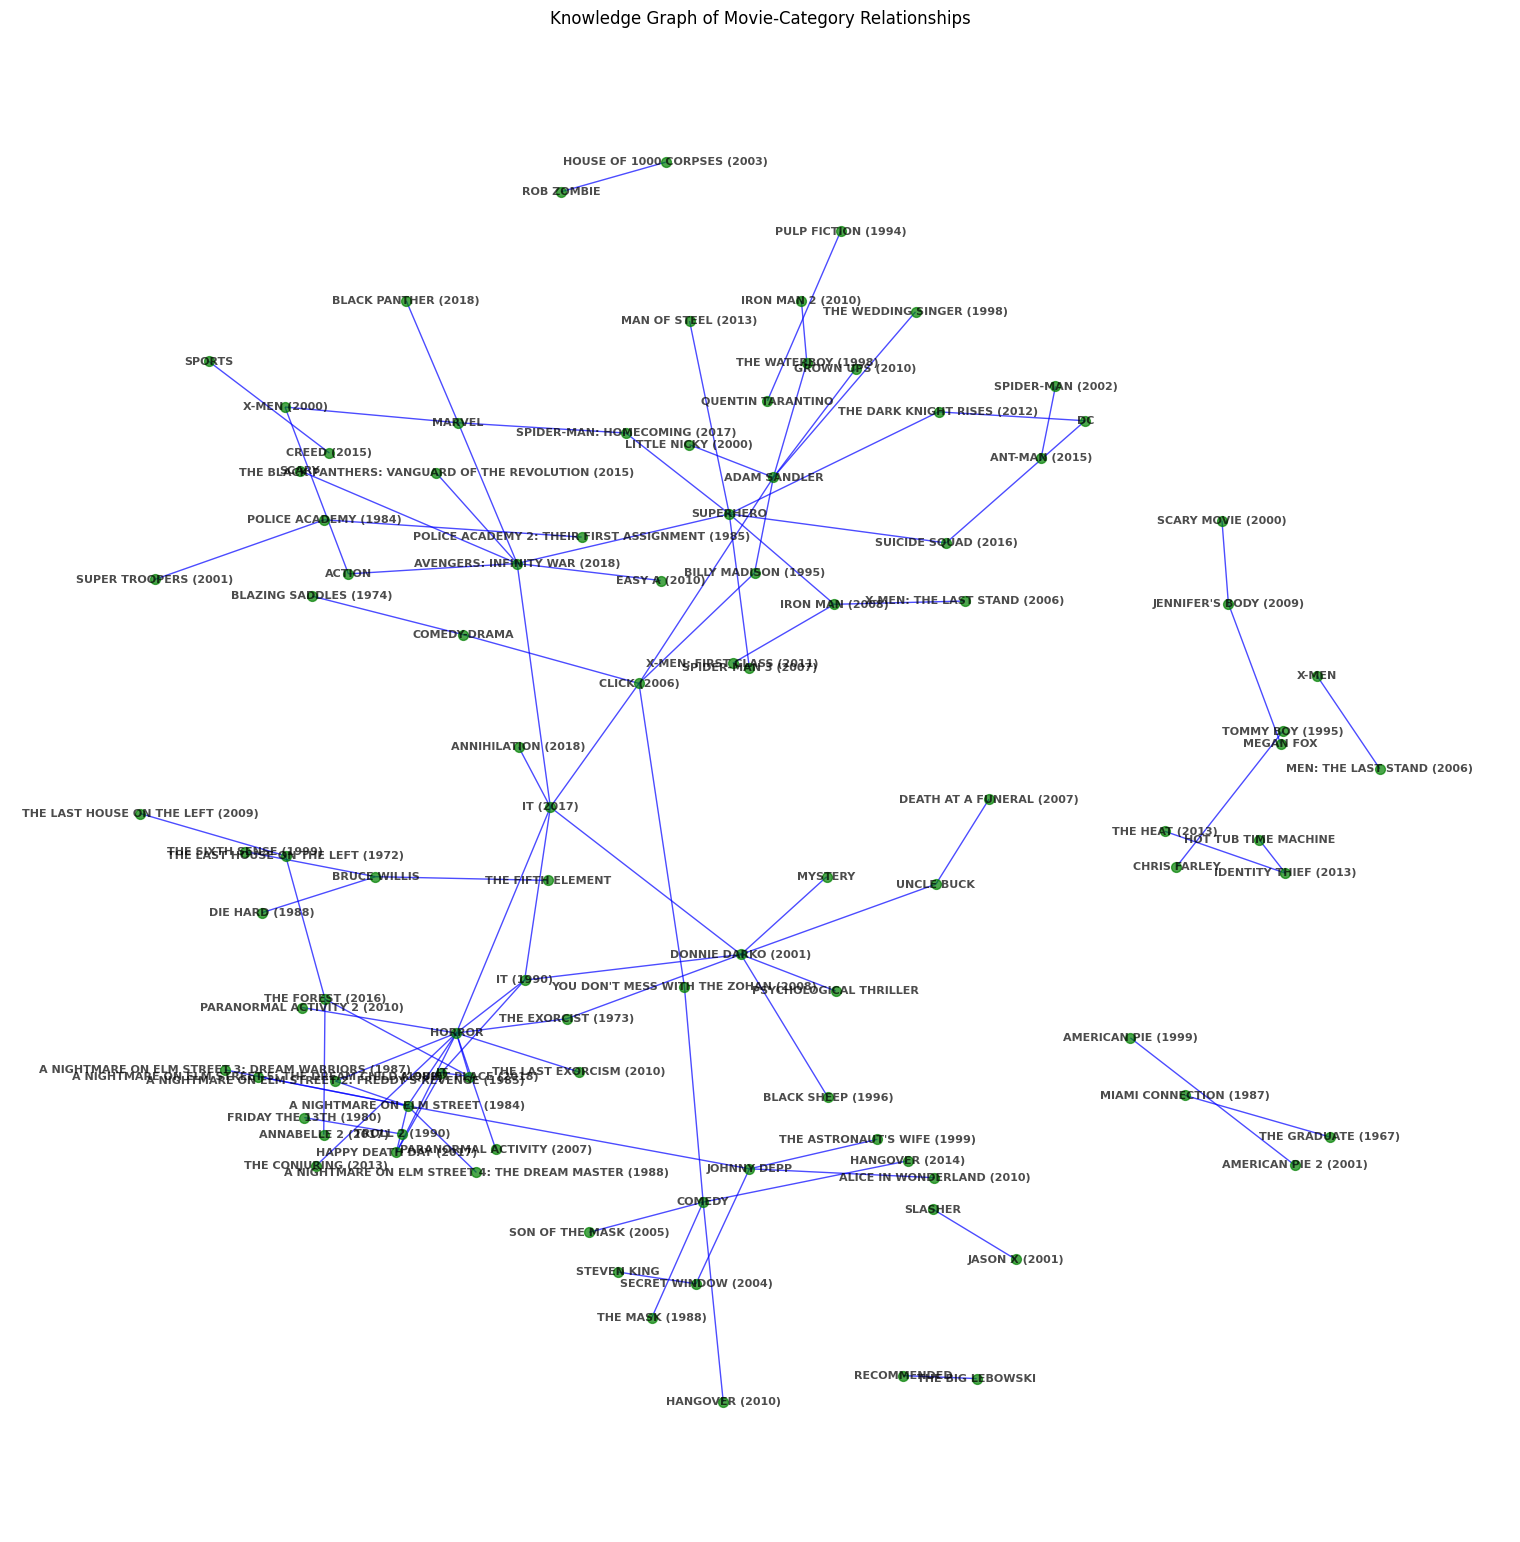

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty directed graph
G = nx.Graph()

# Add edges to the graph based on the source, target, and weight
for _, row in df.iterrows():
    source = row['source']
    target = row['target']
    weight = row['weight']
    G.add_edge(source, target, weight=weight)

# Plotting the graph
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.15, iterations=20)  # Layout for positioning nodes
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8, font_weight='bold', edge_color='b', node_color='g', alpha=0.7)
plt.title('Knowledge Graph of Movie-Category Relationships')
plt.show()


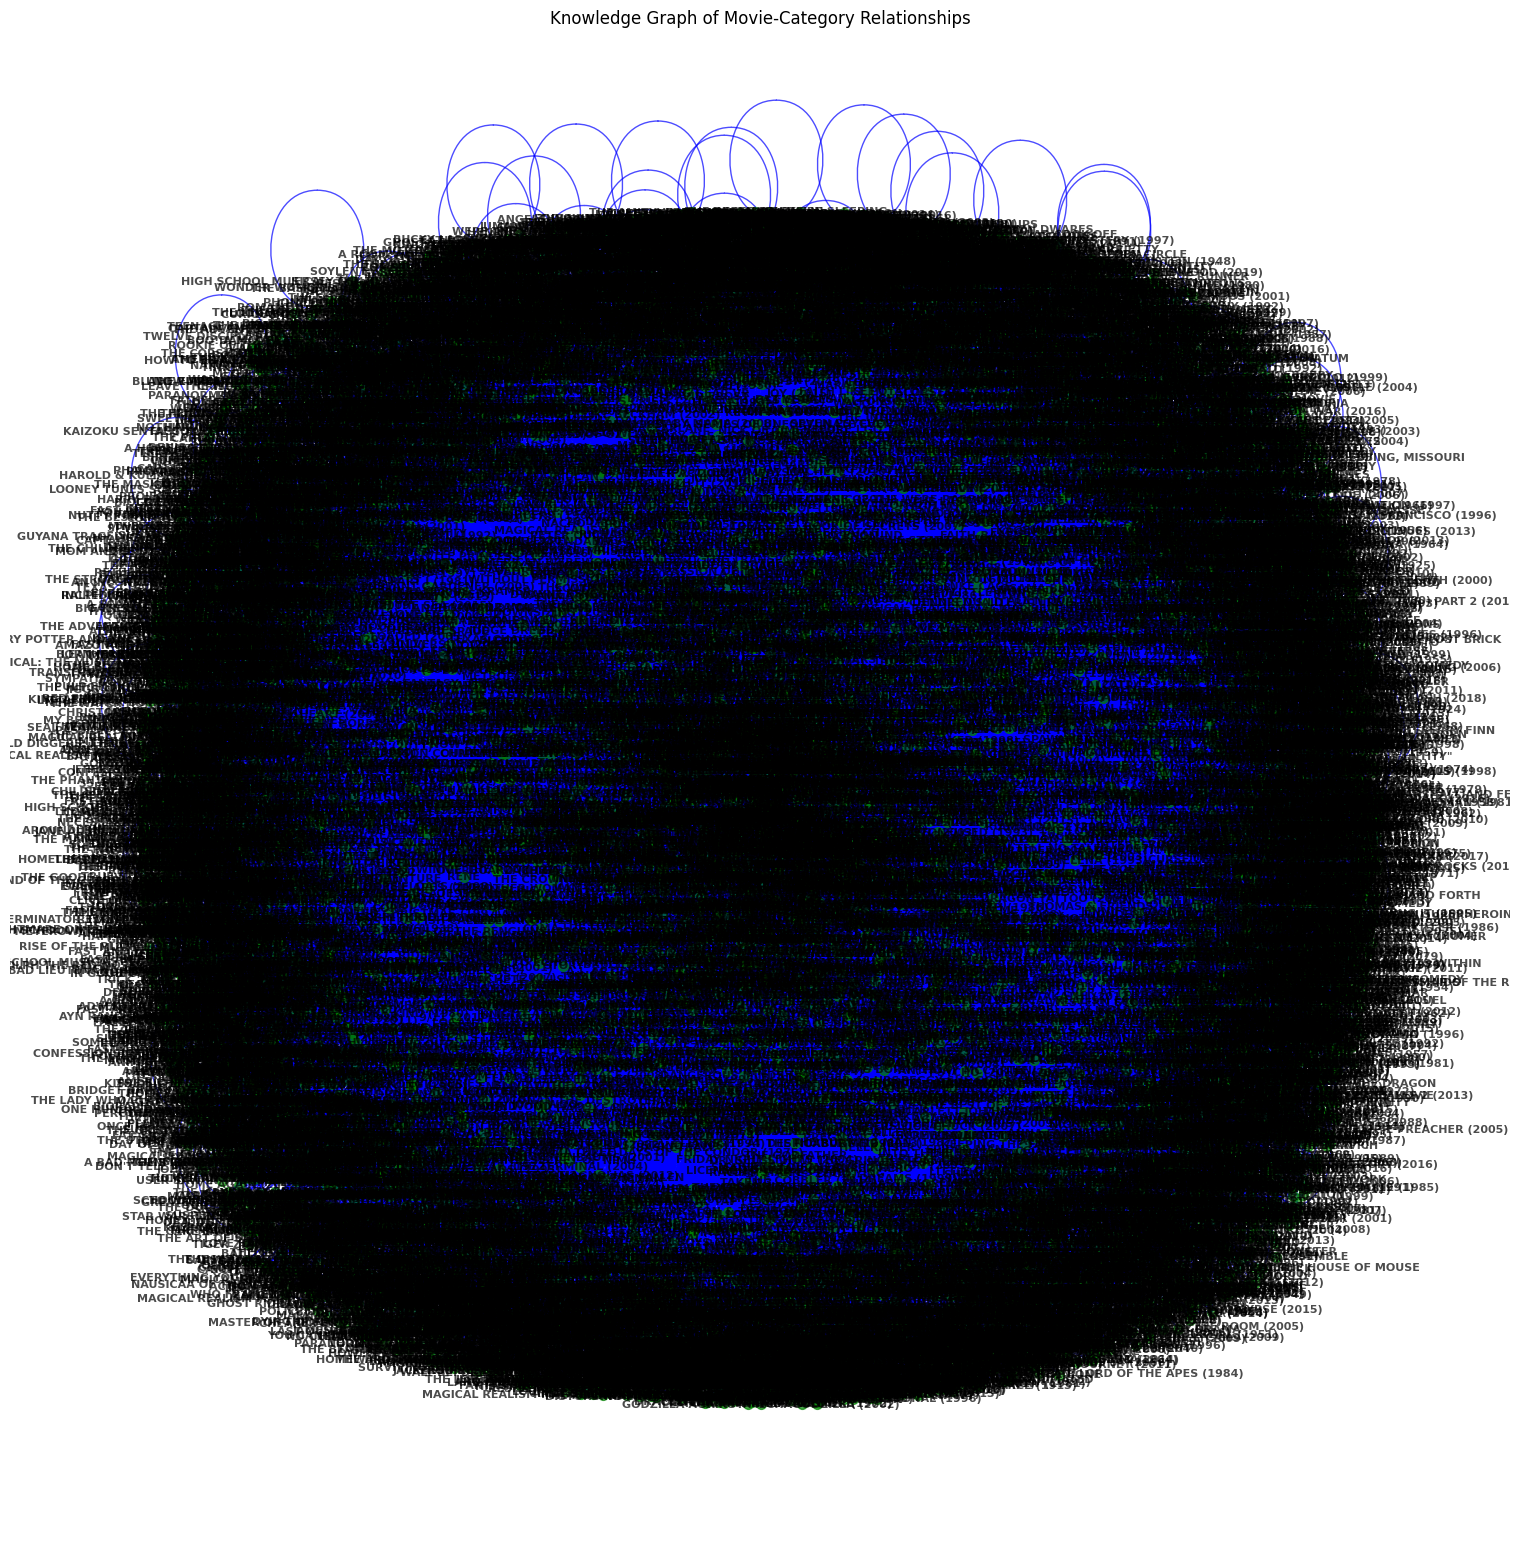

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty directed graph
G = nx.Graph()

# Add edges to the graph based on the source, target, and weight
for _, row in df.iterrows():
    source = row['source']
    target = row['target']
    weight = row['weight']
    G.add_edge(source, target, weight=weight)

# Plotting the graph
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.15, iterations=20)  # Layout for positioning nodes
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8, font_weight='bold', edge_color='b', node_color='g', alpha=0.7)
plt.title('Knowledge Graph of Movie-Category Relationships')
plt.show()
